In [10]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import mlxtend
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_NEO = pd.read_csv('export_dataframe.csv')


In [14]:
col = df_NEO.pop("hazardous")

In [15]:
df_NEO.insert(10,'hazardous',col)

#Basic Data reading and understanding data


In [16]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,False


In [17]:
df_NEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        40000 non-null  int64  
 1   name                      40000 non-null  object 
 2   est_diameter_min          40000 non-null  float64
 3   est_diameter_max          40000 non-null  float64
 4   orbiting_body             40000 non-null  object 
 5   sentry_object             40000 non-null  bool   
 6   Close-Approach (CA) Date  40000 non-null  object 
 7   miss_distance             39798 non-null  float64
 8   relative_velocity         39695 non-null  float64
 9   absolute_magnitude        39840 non-null  float64
 10  hazardous                 40000 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 2.8+ MB


In [18]:
# summary statistics of the data

In [19]:
df_NEO.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,1.129585e+07,1.846201e+07,2.000433e+06,3.299914e+06,3.621612e+06,3.827320e+06,5.427586e+07
est_diameter_min,40000.0,1.482702e-01,3.585850e-01,6.089126e-04,2.140696e-02,6.089126e-02,1.756123e-01,3.789265e+01
est_diameter_max,40000.0,3.315423e-01,8.018205e-01,1.361570e-03,4.786742e-02,1.361570e-01,3.926811e-01,8.473054e+01
miss_distance,39798.0,4.079501e+07,2.098205e+07,1.185167e+04,2.390998e+07,4.237677e+07,5.902371e+07,7.449941e+07
relative_velocity,39695.0,4.938502e+04,2.453765e+04,5.616956e+02,3.014307e+04,4.635959e+04,6.481951e+04,1.299852e+05
absolute_magnitude,39840.0,2.316739e+01,2.924832e+00,9.230000e+00,2.090000e+01,2.320000e+01,2.540000e+01,3.030000e+01


In [20]:
numeric_features = df_NEO.select_dtypes(include = [np.number])

In [21]:
numeric_features.columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'miss_distance',
       'relative_velocity', 'absolute_magnitude'],
      dtype='object')

In [22]:
numeric_features.corr()

,id,est_diameter_min,est_diameter_max,miss_distance,relative_velocity,absolute_magnitude
id,1.000000,-0.124501,-0.124501,0.066135,-0.014315,0.262976
est_diameter_min,-0.124501,1.000000,1.000000,0.090710,0.175492,-0.526919
est_diameter_max,-0.124501,1.000000,1.000000,0.090710,0.175492,-0.526919
miss_distance,0.066135,0.090710,0.090710,1.000000,0.314127,-0.165961
relative_velocity,-0.014315,0.175492,0.175492,0.314127,1.000000,-0.321252
absolute_magnitude,0.262976,-0.526919,-0.526919,-0.165961,-0.321252,1.000000


<AxesSubplot:>

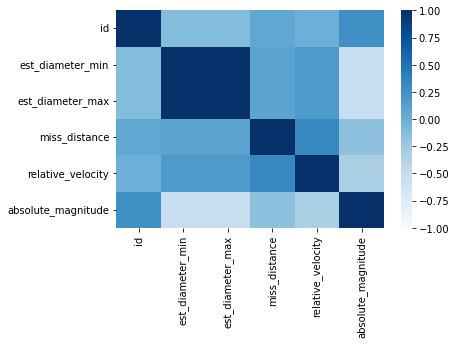

In [23]:
sns.heatmap(numeric_features.corr(),vmin =-1,vmax = 1,cmap = 'Blues')

In [24]:
#Data cleaning

In [25]:
#Handling missing values

In [26]:
missing_values_count = df_NEO.isnull().sum()

In [27]:
missing_values_count[:]

id                            0
name                          0
est_diameter_min              0
est_diameter_max              0
orbiting_body                 0
sentry_object                 0
Close-Approach (CA) Date      0
miss_distance               202
relative_velocity           305
absolute_magnitude          160
hazardous                     0
dtype: int64

In [28]:
 # see what percentage of values are missing 
    

In [29]:
total_cells = np.product(df_NEO.shape)

In [30]:
missing = missing_values_count.sum()

In [31]:
(missing/total_cells)*100

0.1515909090909091

In [32]:
# replace missing values with what comes after it in the same column

In [33]:
df_NEO['miss_distance'].fillna(method = 'bfill', inplace = True)

In [34]:
df_NEO['relative_velocity'].fillna(method = 'bfill', inplace = True)

In [35]:
df_NEO['absolute_magnitude'].fillna(method = 'bfill', inplace = True)

In [36]:
df_NEO.isnull().sum()

id                          0
name                        0
est_diameter_min            0
est_diameter_max            0
orbiting_body               0
sentry_object               0
Close-Approach (CA) Date    0
miss_distance               0
relative_velocity           0
absolute_magnitude          0
hazardous                   0
dtype: int64

In [37]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,False


In [38]:
# Mapping the target variable to 1 and 0
df_NEO.hazardous=df_NEO.hazardous.map({True:1,False:0})

In [39]:
y = df_NEO.hazardous

In [40]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,1
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,0
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,0
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,0
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,0
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,0


In [41]:
data = df_NEO[['est_diameter_min','relative_velocity', 'absolute_magnitude']] 

In [42]:
data.head()

,est_diameter_min,relative_velocity,absolute_magnitude
0,1.198271,13569.249224,16.73
1,0.265800,73588.726663,20.00
2,0.722030,114258.692129,17.83
3,0.096506,24764.303138,22.20
4,0.255009,42737.733765,20.09


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['est_diameter_min','relative_velocity','absolute_magnitude'])
scaled_data.head()

,est_diameter_min,relative_velocity,absolute_magnitude
0,0.031607,0.100504,0.355956
1,0.006999,0.564248,0.511153
2,0.019039,0.878488,0.408163
3,0.002531,0.187003,0.615567
4,0.006714,0.325876,0.515425


In [44]:
# to detect anomalies in the data, first check if the column is normally distributed


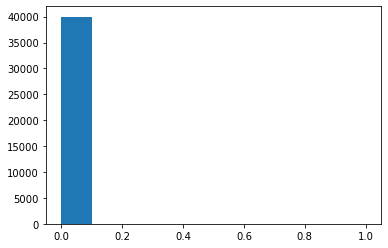

In [45]:
from matplotlib import pyplot
pyplot.hist(scaled_data['est_diameter_min'])
pyplot.show()

In [46]:
# perform univariate analysis on the data

In [47]:
df_NEO.dtypes

id                            int64
name                         object
est_diameter_min            float64
est_diameter_max            float64
orbiting_body                object
sentry_object                  bool
Close-Approach (CA) Date     object
miss_distance               float64
relative_velocity           float64
absolute_magnitude          float64
hazardous                     int64
dtype: object

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
df_NEO.head()

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,1


In [50]:
# drawing a scatterplot for est_diameter_min


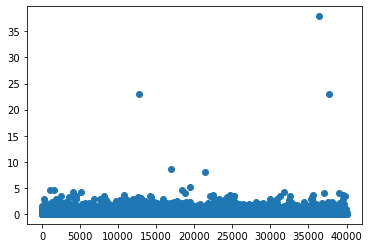

In [51]:
plt.scatter(df_NEO.index, df_NEO['est_diameter_min'])

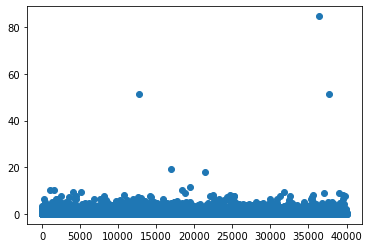

In [52]:
plt.scatter(df_NEO.index, df_NEO['est_diameter_max'])

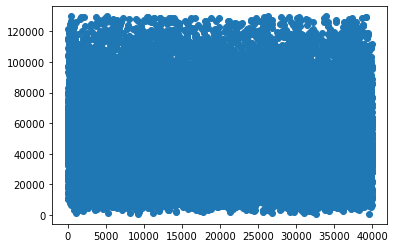

In [53]:
plt.scatter(df_NEO.index, df_NEO['relative_velocity'])

In [54]:
df_NEO['hazardous'].value_counts()

0    35365
1     4635
Name: hazardous, dtype: int64

In [55]:
df_NEO['hazardous'].value_counts(normalize = True)

0    0.884125
1    0.115875
Name: hazardous, dtype: float64

<AxesSubplot:>

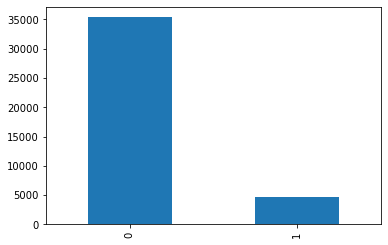

In [56]:
df_NEO['hazardous'].value_counts().plot.bar()

<AxesSubplot:>

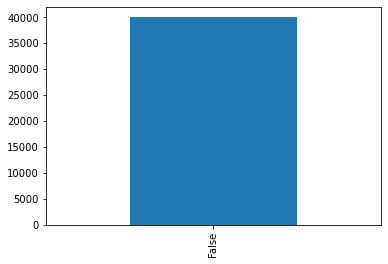

In [57]:
df_NEO['sentry_object'].value_counts().plot.bar()

In [58]:
print(df_NEO.nunique())

id                          15719
name                        15719
est_diameter_min             1390
est_diameter_max             1390
orbiting_body                   1
sentry_object                   1
Close-Approach (CA) Date    31198
miss_distance               39695
relative_velocity           39690
absolute_magnitude           1359
hazardous                       2
dtype: int64


In [59]:
#calculating median of columns and comparing it with mean to find out if the data is normally distributed or skewed

In [60]:
df_NEO.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,1.129585e+07,1.846201e+07,2.000433e+06,3.299914e+06,3.621612e+06,3.827320e+06,5.427586e+07
est_diameter_min,40000.0,1.482702e-01,3.585850e-01,6.089126e-04,2.140696e-02,6.089126e-02,1.756123e-01,3.789265e+01
est_diameter_max,40000.0,3.315423e-01,8.018205e-01,1.361570e-03,4.786742e-02,1.361570e-01,3.926811e-01,8.473054e+01
miss_distance,40000.0,4.080261e+07,2.097845e+07,1.185167e+04,2.392831e+07,4.238516e+07,5.902303e+07,7.449941e+07
relative_velocity,40000.0,4.938134e+04,2.454829e+04,5.616956e+02,3.013684e+04,4.635753e+04,6.481940e+04,1.299852e+05
absolute_magnitude,40000.0,2.316766e+01,2.926833e+00,9.230000e+00,2.090000e+01,2.320000e+01,2.540000e+01,3.030000e+01
hazardous,40000.0,1.158750e-01,3.200790e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [61]:
df_NEO['est_diameter_min'].median()

0.0608912622

In [62]:
df_NEO['est_diameter_max'].median()

0.1361570015

In [63]:
df_NEO['miss_distance'].median()

42385162.38054554

In [64]:
df_NEO['absolute_magnitude'].median()

23.2

In [65]:
df_NEO.describe(include=['O'])

,name,orbiting_body,Close-Approach (CA) Date
count,40000,40000,40000
unique,15719,1,31198
top,469219 Kamo`oalewa (2016 HO3),Earth,1900-Jan-04 22:25 ± 00:02
freq,24,40000,2


In [66]:
# confirming that est_diameter_min is right skewed


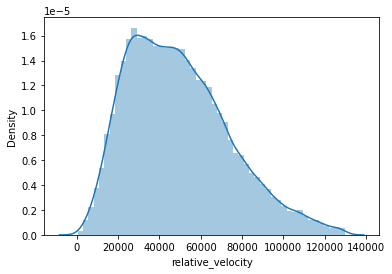

In [67]:
sns.distplot(df_NEO.relative_velocity)
plt.show()

In [68]:
#Feature engineering to find out the avg diameter

In [69]:
df_NEO['est_diameter_avg']=(df_NEO.est_diameter_max+df_NEO.est_diameter_min)/2

In [70]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,0,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,1,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,0,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,0,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,1,0.412613
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,0,0.058822
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,0,0.277679
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,0,0.008621
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,0,0.566947
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,0,0.171215


In [71]:
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df_NEO[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000
mean,0.148270,0.331542,49381.340496,4.080261e+07,23.167659
std,0.358585,0.801821,24548.290082,2.097845e+07,2.926833
min,0.000609,0.001362,561.695602,1.185167e+04,9.230000
25%,0.021407,0.047867,30136.836229,2.392831e+07,20.900000
50%,0.060891,0.136157,46357.531400,4.238516e+07,23.200000
75%,0.175612,0.392681,64819.401878,5.902303e+07,25.400000
max,37.892650,84.730541,129985.246736,7.449941e+07,30.300000


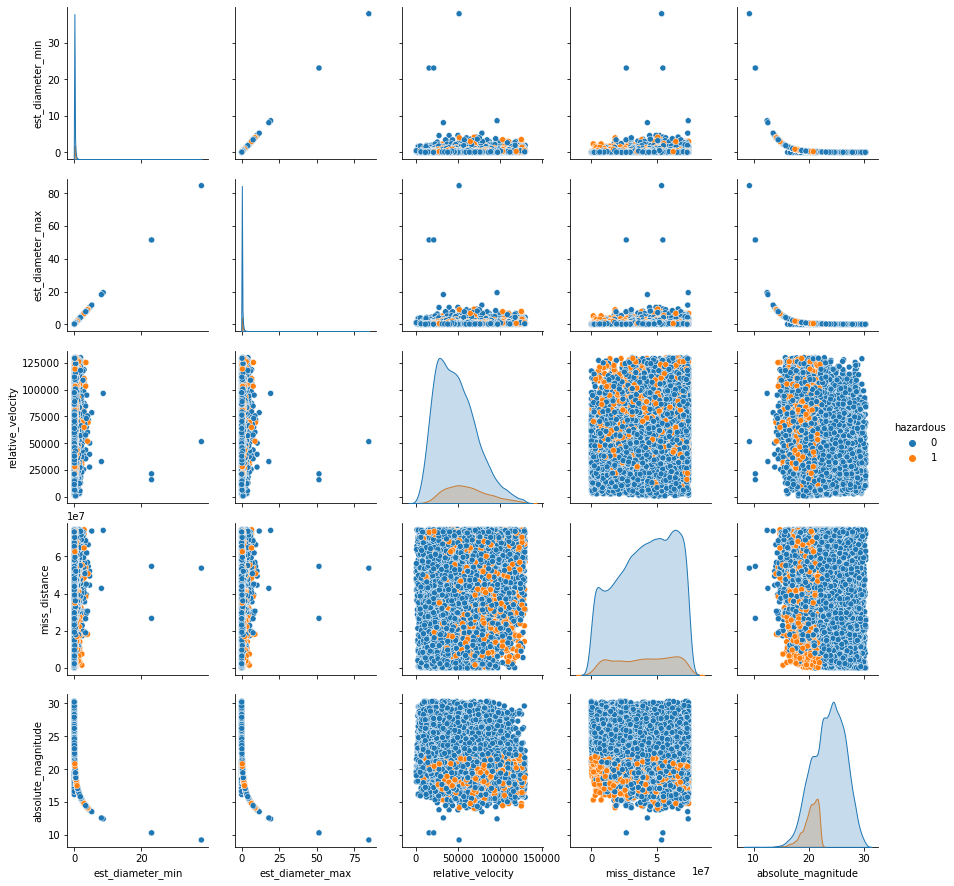

In [72]:
fig= sns.pairplot(df_NEO[numeric_df+['hazardous']],hue = 'hazardous')

In [73]:
 import pandas as pd
 

In [74]:
_df = df_NEO.select_dtypes(include='number')

In [75]:
_df.head(10)

,id,est_diameter_min,est_diameter_max,miss_distance,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,1.198271,2.679415,5.483974e+07,13569.249224,16.73,0,1.938843
1,2277475,0.265800,0.594347,6.143813e+07,73588.726663,20.00,1,0.430073
2,2512244,0.722030,1.614507,4.979872e+07,114258.692129,17.83,0,1.168268
3,3596030,0.096506,0.215794,2.543497e+07,24764.303138,22.20,0,0.156150
4,3667127,0.255009,0.570217,4.627557e+07,42737.733765,20.09,1,0.412613
5,54138696,0.036354,0.081291,4.058569e+07,34297.587778,24.32,0,0.058822
6,54189957,0.171615,0.383743,2.906912e+07,27529.472307,20.95,0,0.277679
7,54230078,0.005328,0.011914,5.511502e+07,57544.470083,28.49,0,0.008621
8,2088213,0.350393,0.783502,6.903598e+07,56625.210122,19.40,0,0.566947
9,3766065,0.105817,0.236614,3.835526e+07,48425.840329,22.00,0,0.171215


In [76]:
_df.drop(columns = 'id')

,est_diameter_min,est_diameter_max,miss_distance,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,1.198271,2.679415,5.483974e+07,13569.249224,16.73,0,1.938843
1,0.265800,0.594347,6.143813e+07,73588.726663,20.00,1,0.430073
2,0.722030,1.614507,4.979872e+07,114258.692129,17.83,0,1.168268
3,0.096506,0.215794,2.543497e+07,24764.303138,22.20,0,0.156150
4,0.255009,0.570217,4.627557e+07,42737.733765,20.09,1,0.412613
...,...,...,...,...,...,...,...
39995,0.096506,0.215794,3.927440e+07,31522.477578,22.20,0,0.156150
39996,0.088015,0.196807,4.803361e+07,34329.455698,22.40,0,0.142411
39997,0.006991,0.015633,7.318315e+07,40139.464355,27.90,0,0.011312
39998,0.049723,0.111183,9.690456e+06,37920.870920,23.64,0,0.080453


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(_df[['relative_velocity', 'absolute_magnitude']])
scaled_data = pd.DataFrame(scaled_data, columns=['s_relative_velocity','s_absolute_magnitude'])
scaled_data.head()

,s_relative_velocity,s_absolute_magnitude
0,0.100504,0.355956
1,0.564248,0.511153
2,0.878488,0.408163
3,0.187003,0.615567
4,0.325876,0.515425


In [78]:
col1 = scaled_data["s_relative_velocity"]

In [79]:
_df.insert(4,'s_relative_velocity',col1)

In [80]:
_df.head(10)

,id,est_diameter_min,est_diameter_max,miss_distance,s_relative_velocity,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,1.198271,2.679415,5.483974e+07,0.100504,13569.249224,16.73,0,1.938843
1,2277475,0.265800,0.594347,6.143813e+07,0.564248,73588.726663,20.00,1,0.430073
2,2512244,0.722030,1.614507,4.979872e+07,0.878488,114258.692129,17.83,0,1.168268
3,3596030,0.096506,0.215794,2.543497e+07,0.187003,24764.303138,22.20,0,0.156150
4,3667127,0.255009,0.570217,4.627557e+07,0.325876,42737.733765,20.09,1,0.412613
5,54138696,0.036354,0.081291,4.058569e+07,0.260663,34297.587778,24.32,0,0.058822
6,54189957,0.171615,0.383743,2.906912e+07,0.208368,27529.472307,20.95,0,0.277679
7,54230078,0.005328,0.011914,5.511502e+07,0.440281,57544.470083,28.49,0,0.008621
8,2088213,0.350393,0.783502,6.903598e+07,0.433179,56625.210122,19.40,0,0.566947
9,3766065,0.105817,0.236614,3.835526e+07,0.369826,48425.840329,22.00,0,0.171215


In [81]:
_df.head(10)

,id,est_diameter_min,est_diameter_max,miss_distance,s_relative_velocity,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,1.198271,2.679415,5.483974e+07,0.100504,13569.249224,16.73,0,1.938843
1,2277475,0.265800,0.594347,6.143813e+07,0.564248,73588.726663,20.00,1,0.430073
2,2512244,0.722030,1.614507,4.979872e+07,0.878488,114258.692129,17.83,0,1.168268
3,3596030,0.096506,0.215794,2.543497e+07,0.187003,24764.303138,22.20,0,0.156150
4,3667127,0.255009,0.570217,4.627557e+07,0.325876,42737.733765,20.09,1,0.412613
5,54138696,0.036354,0.081291,4.058569e+07,0.260663,34297.587778,24.32,0,0.058822
6,54189957,0.171615,0.383743,2.906912e+07,0.208368,27529.472307,20.95,0,0.277679
7,54230078,0.005328,0.011914,5.511502e+07,0.440281,57544.470083,28.49,0,0.008621
8,2088213,0.350393,0.783502,6.903598e+07,0.433179,56625.210122,19.40,0,0.566947
9,3766065,0.105817,0.236614,3.835526e+07,0.369826,48425.840329,22.00,0,0.171215


In [82]:
df1 = _df.drop(columns = ['id','relative_velocity','miss_distance'])

In [83]:
df1.head(10)

,est_diameter_min,est_diameter_max,s_relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,1.198271,2.679415,0.100504,16.73,0,1.938843
1,0.265800,0.594347,0.564248,20.00,1,0.430073
2,0.722030,1.614507,0.878488,17.83,0,1.168268
3,0.096506,0.215794,0.187003,22.20,0,0.156150
4,0.255009,0.570217,0.325876,20.09,1,0.412613
5,0.036354,0.081291,0.260663,24.32,0,0.058822
6,0.171615,0.383743,0.208368,20.95,0,0.277679
7,0.005328,0.011914,0.440281,28.49,0,0.008621
8,0.350393,0.783502,0.433179,19.40,0,0.566947
9,0.105817,0.236614,0.369826,22.00,0,0.171215


In [84]:
# Splitting the data into x and y
x=df1.drop(columns='hazardous')
y=df1.hazardous


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)


In [87]:
# Shape of the train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((32000, 5), (32000,), (8000, 5), (8000,))

In [88]:
# checking evaluation scores before modelling

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def evaluation(y_test,y_pred):
    
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    


In [89]:
# applying logistic regression model to our data
#using standard scaler and scaling train and test data 

In [90]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

s_x_train=pd.DataFrame(st.fit_transform(x_train),columns=x_train.columns)
s_x_test=pd.DataFrame(st.transform(x_test),columns=x_test.columns)

In [91]:
#creating a machine instance of the model
import sklearn.linear_model as sk

logreg = sk.LogisticRegression()

In [121]:
logreg_model = logreg.fit(s_x_train,y_train)
y_pred_log = logreg_model.predict(s_x_test)

Accuracy: 0.883375
f1_score: 0.0
Precision: 0.0
Recall: 0.0
Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7073
           1       0.00      0.00      0.00       927

    accuracy                           0.88      8000
   macro avg       0.44      0.50      0.47      8000
weighted avg       0.78      0.88      0.83      8000



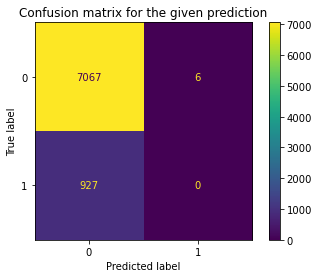

In [122]:
evaluation(y_test,y_pred_log)

In [123]:
y_train

34737    0
21672    0
37969    0
29076    0
27625    1
        ..
10848    0
35982    0
3016     1
18919    0
26876    0
Name: hazardous, Length: 32000, dtype: int64

In [124]:
print (y_train.value_counts(), '\n \n \n', y_test.value_counts())

0    28292
1     3708
Name: hazardous, dtype: int64 
 
 
 0    7073
1     927
Name: hazardous, dtype: int64


In [125]:

print("Accuracy of LR:",logreg.score(s_x_test,y_test))
print(classification_report(y_test,y_pred_log))

Accuracy of LR: 0.883375
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7073
           1       0.00      0.00      0.00       927

    accuracy                           0.88      8000
   macro avg       0.44      0.50      0.47      8000
weighted avg       0.78      0.88      0.83      8000



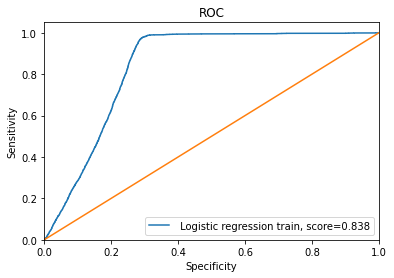

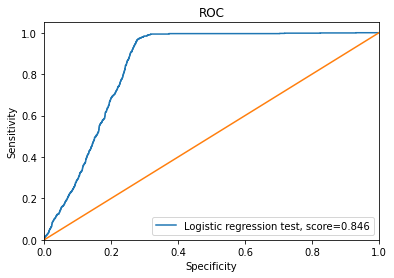

In [155]:
# ROC for logistic regression model
from sklearn.metrics import roc_curve, roc_auc_score


# Model_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(s_x_test)[:,1])

Ypred_train = logreg_model.predict_proba(s_x_train)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train,  Ypred_train)

#plt.figure()
plt.plot(fpr_train,tpr_train,label=" Logistic regression train, score="+str(round(roc_auc_score(y_train, Ypred_train), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Ypred_test = logreg_model.predict_proba(s_x_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test,  Ypred_test)

#plt.figure()
plt.plot(fpr_test,tpr_test,label="Logistic regression test, score="+str(round(roc_auc_score(y_test, Ypred_test), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [128]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_log)
print(auc)

0.49957585183090625


In [129]:
s_x_test

,est_diameter_min,est_diameter_max,s_relative_velocity,absolute_magnitude,est_diameter_avg
0,0.033895,0.033895,-0.916955,-0.710170,0.033895
1,0.031940,0.031940,0.889896,-0.706753,0.031940
2,-0.337525,-0.337525,-0.301725,0.820953,-0.337525
3,-0.070308,-0.070308,-1.286742,-0.501691,-0.070308
4,-0.215031,-0.215031,0.446582,-0.057392,-0.215031
...,...,...,...,...,...
7995,-0.349233,-0.349233,-1.149037,1.002090,-0.349233
7996,-0.324461,-0.324461,-0.452766,0.660322,-0.324461
7997,-0.345147,-0.345147,-0.134288,0.933736,-0.345147
7998,-0.285201,-0.285201,-1.058968,0.318553,-0.285201


<AxesSubplot:xlabel='est_diameter_avg', ylabel='hazardous'>

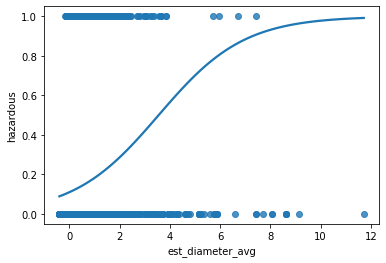

In [130]:
sns.regplot(x=s_x_test['est_diameter_avg'], y=y_test, logistic=True, ci=None)

<AxesSubplot:xlabel='s_relative_velocity', ylabel='hazardous'>

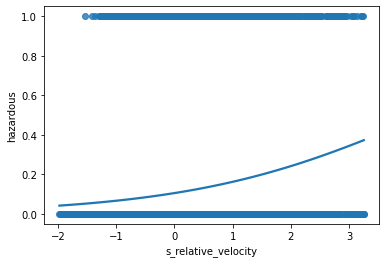

In [131]:
sns.regplot(x=s_x_test['s_relative_velocity'], y=y_test, logistic=True, ci=None)

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [133]:
dt_model=dtree.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [134]:
#observing the evaluation metrics for our model

Accuracy: 0.865
f1_score: 0.4181034482758621
Precision: 0.4176533907427341
Recall: 0.418554476806904
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7073
           1       0.42      0.42      0.42       927

    accuracy                           0.86      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.87      0.86      0.87      8000



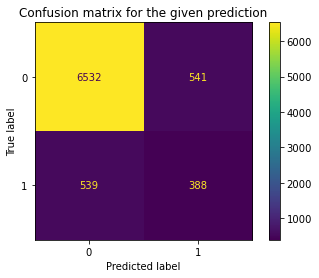

In [135]:
evaluation(y_test,y_pred)

In [136]:
# instantiate the DecisionTreeClassifier model with criterion gini index

dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
dt_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [137]:
y_pred_gini = dt_gini.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8841


In [139]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7073
           1       0.50      0.00      0.00       927

    accuracy                           0.88      8000
   macro avg       0.69      0.50      0.47      8000
weighted avg       0.84      0.88      0.83      8000



Accuracy: 0.884125
f1_score: 0.002152852529601722
Precision: 0.5
Recall: 0.0010787486515641855
Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7073
           1       0.50      0.00      0.00       927

    accuracy                           0.88      8000
   macro avg       0.69      0.50      0.47      8000
weighted avg       0.84      0.88      0.83      8000



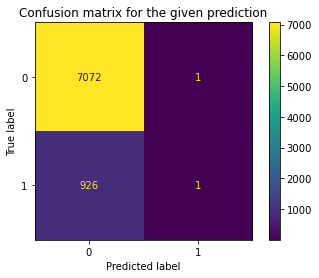

In [140]:
evaluation(y_test,y_pred_gini)

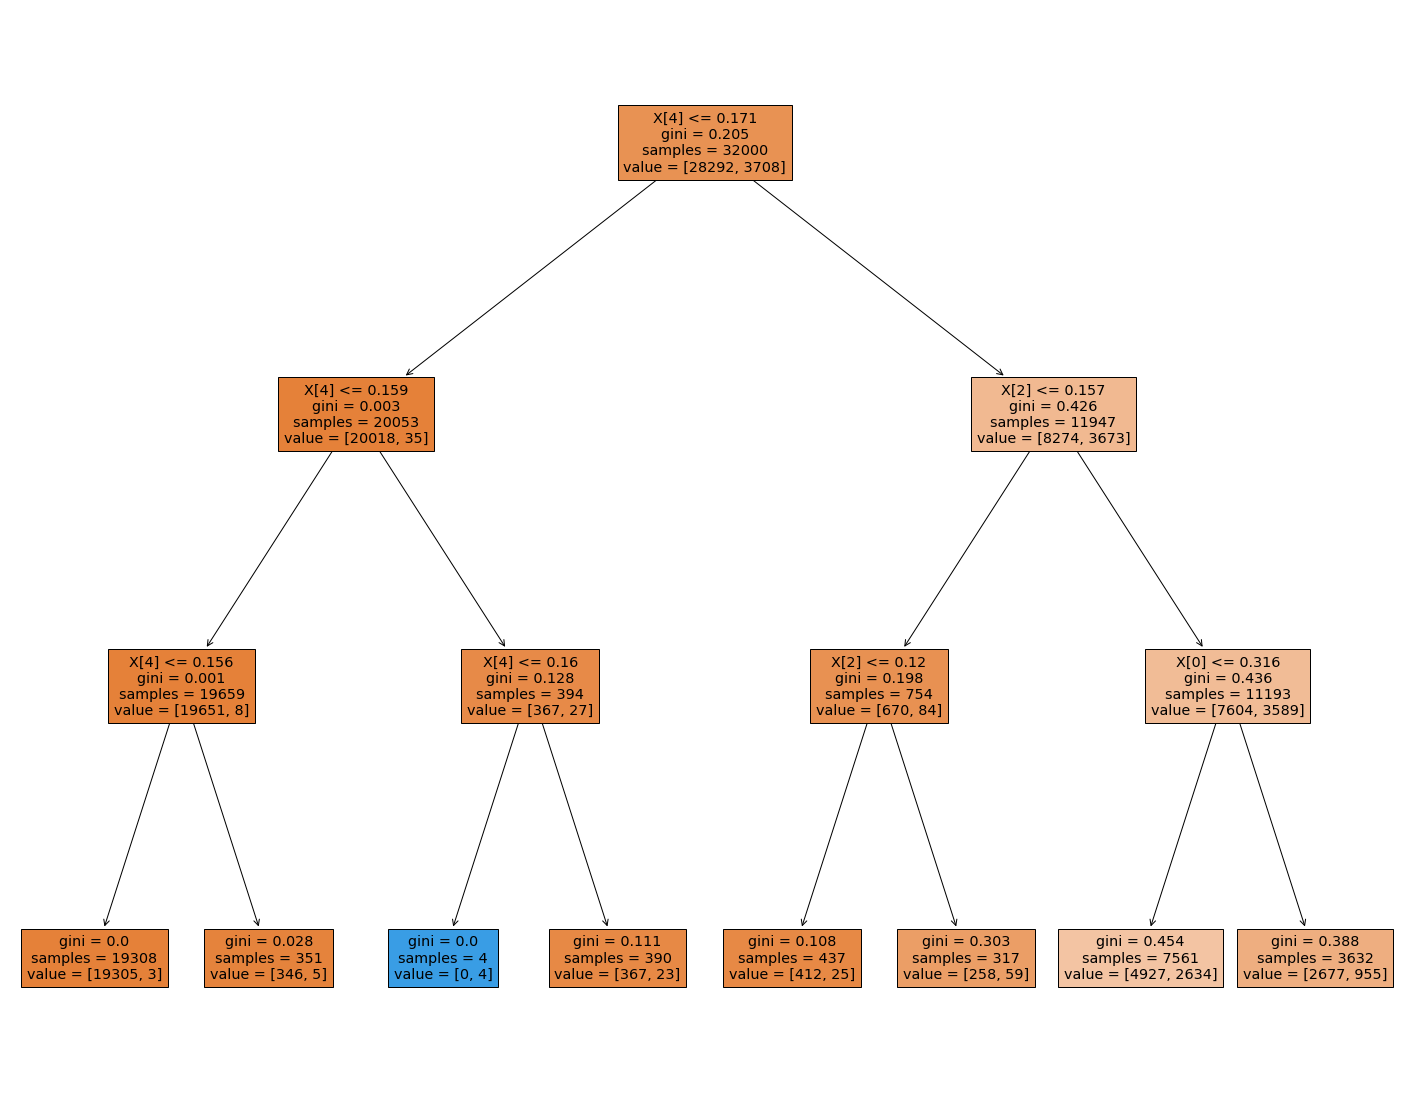

In [141]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_gini,filled=True)

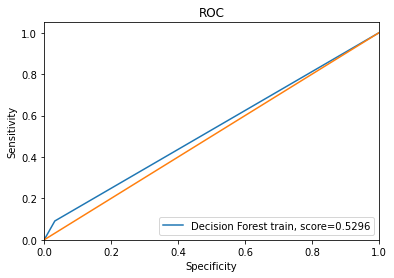

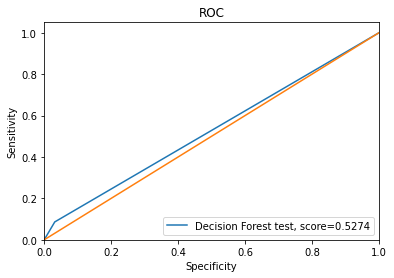

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score


# Model_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(s_x_test)[:,1])

Ypred_train = dt_model.predict_proba(s_x_train)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train,  Ypred_train)

#plt.figure()
plt.plot(fpr_train,tpr_train,label="Decision Forest train, score="+str(round(roc_auc_score(y_train, Ypred_train), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Ypred_test = dt_model.predict_proba(s_x_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test,  Ypred_test)

#plt.figure()
plt.plot(fpr_test,tpr_test,label="Decision Forest test, score="+str(round(roc_auc_score(y_test, Ypred_test), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [145]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

0.6710332118235002
